# Spectral Analysis for paper

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
from tqdm import tqdm
import swordfish as sf
from WIMpy import DMUtils as DMU
from scipy.interpolate import interp1d
from scipy.integrate import cumtrapz, quad
from scipy.special import erf
from paleo.paleopy_classes import *
import paleo.paleopy as paleopy

rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['cmr']})
rc('font',**{'family':'serif','serif':['cmr']})
rc('font', size=16)
#mpl.rcParams.update({'font.size': 16,'font.family':'serif'})

mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

#%matplotlib inline

#### Load in the relevant rocks

In [2]:
Zab = Mineral("Zabuyelite")
Syl = Mineral("Sylvanite")
Sinj = Mineral("Sinjarite")
Oliv = Mineral("Olivine")
#Gyp = Mineral("Gypsum")

#### Calculating information flux

In [3]:
def MakeSF(mineral, sigma, exposure):
    systematics = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1e-3, 1e-3]
    dRdx_BG = paleopy.GetBackground(mineral, sigma)
    SF = sf.Swordfish(dRdx_BG, T=systematics, E=np.ones_like(dRdx_BG[0])*exposure)
    return SF
    
def GetInformationFlux(mineral, m_x, sigma, exposure, SF):
    ref_sig = 1e-47
    sig = paleopy.GetSignal(mineral, sigma, m_DM=m_x, xsec=ref_sig)
    flux = SF.infoflux(sig)
    
    return flux

#### Plotting information flux

In [5]:
def PlotInformationFlux(mineral):
    SF_1nm = MakeSF(mineral, 1.0, 1.0)
    SF_15nm = MakeSF(mineral, 15.0, 100.0)
    
    mlist = [5, 50, 500]
    
    flux_1nm = [GetInformationFlux(mineral, mx, 1.0, 1.0, SF_1nm) for mx in mlist]
    flux_15nm = [GetInformationFlux(mineral, mx, 15.0, 100.0, SF_15nm) for mx in mlist]
    

    sigma_list = [1.0, 15.0]
    exp_list = [1.0, 100.0]
    flux_list = [flux_1nm, flux_15nm]
    
    
    for j in range(2):
    
        sig = sigma_list[j]
        exp = exp_list[j]
        flux = flux_list[j]
    
    
        plt.figure(figsize=(7,5))

        ax = plt.gca()

        ax.set_xscale("log")
        ax.set_yscale("log")

        for i in range(3):
            ax.step(paleopy.calcBins(sig)[:-1] + sig/2, flux[i], label=r'$m_\chi = ' + str(mlist[i]) + " $ GeV")

        plt.xlabel("$x_T ~[\mathrm{nm}]$")
        plt.ylabel("Information Flux [A.U.]")

        plt.title(mineral.name)

        labtext = r'$\sigma_{x_T} = ' + str(int(sig)) + '\,\mathrm{nm}; \,\,\epsilon = ' + str(int(exp)) + '\,\mathrm{kg}\,\mathrm{Myr}$'
        plt.text(0.05, 0.9, labtext, fontsize=16, ha='left',transform=ax.transAxes)

        plt.legend(fontsize=14,loc='upper right')

        plt.xlim(1, 1000)
        plt.ylim(1e-6, 1.05)

        outfile = '../plots/InfoFlux_' + mineral.name + '_exp' + str(exp) + '_sig' + str(sig) + '.pdf'
        
        plt.savefig(outfile, bbox_inches="tight")

        plt.show()
    

--------------

## Sinjarite

lambda_238 [yr^-1]: 1.551358953804712e-10
lambda_234 [yr^-1]: 2.82341010411383e-06
224914555.7512617


/Users/bradkav/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


lambda_238 [yr^-1]: 1.551358953804712e-10
lambda_234 [yr^-1]: 2.82341010411383e-06
224671114.9300707


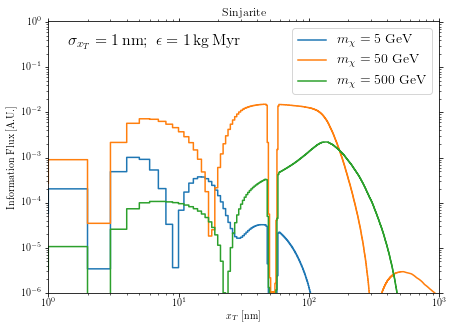

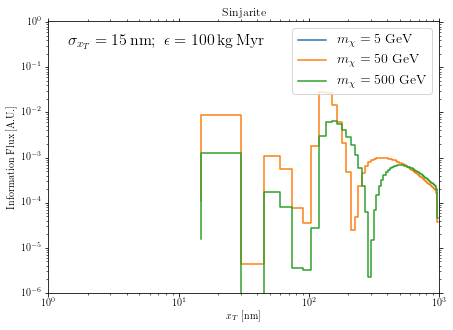

In [6]:
PlotInformationFlux(Sinj)

#### Optimal bin position

In [65]:
SF_Sinj_15nm = MakeSF(Sinj, 15.0, 100.0)

mlist = np.logspace(-0.5, 3, 50)

flux_15nm = [GetInformationFlux(Sinj, mx, 15.0, 100.0, SF_Sinj_15nm) for mx in mlist]

/Users/bradkav/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/bradkav/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


In [66]:
bin_centres = paleopy.calcBins(15.0)[:-1] + 15.0/2

fluxmax = np.array([bin_centres[np.argmax(flux_15nm[i])] for i in range(len(mlist))])

In [67]:
print(fluxmax)

[ 90.  30.  15.  30.  30.  45.  30.  30.  15.  15.  15.  15.  30.  15.
  45.  75.  75.  15.  90.  15.  15.  75.  75.  90.  60.  60.  45.  45.
 105. 105. 120. 120. 120. 135. 135. 135. 135. 135. 150. 150. 150. 150.
 150. 150. 150. 150. 150. 150. 150. 150.]


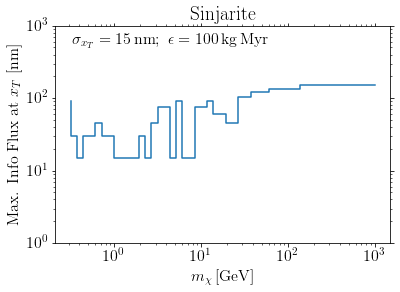

In [79]:
plt.figure()

ax = plt.gca()

ax.set_xscale('log')
ax.set_yscale('log')

plt.step(mlist, fluxmax)

plt.ylim(1, 1000)

plt.xlabel(r'$m_\chi \, \mathrm{[GeV]}$')
plt.ylabel(r'Max. Info Flux at $x_T$~[nm]')

plt.title(Sinj.name)

sig = 15.0
exp = 100.0

labtext = r'$\sigma_{x_T} = ' + str(int(sig)) + '\,\mathrm{nm}; \,\,\epsilon = ' + str(int(exp)) + '\,\mathrm{kg}\,\mathrm{Myr}$'
plt.text(0.05, 0.9, labtext, fontsize=16, ha='left',transform=ax.transAxes)

plt.savefig('../plots/MaxInfoFlux_Sinjarite_exp' + str(exp) + '_sig' + str(sig) + '.pdf', bbox_inches='tight')

plt.show()

In [74]:
SF_Sinj_1nm = MakeSF(Sinj, 1.0, 1.0)

mlist = np.logspace(-0.5, 3, 50)

flux_1nm = [GetInformationFlux(Sinj, mx, 1.0, 1.0, SF_Sinj_1nm) for mx in mlist]

/Users/bradkav/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [75]:
bin_centres = paleopy.calcBins(1.0)[:-1] + 1.0/2

fluxmax_1nm = np.array([bin_centres[np.argmax(flux_1nm[i])] for i in range(len(mlist))])

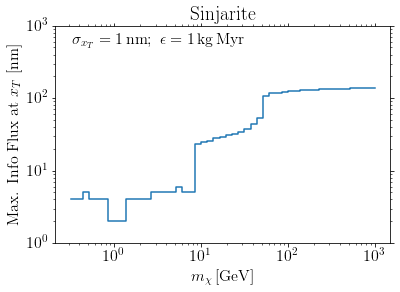

In [80]:
plt.figure()

ax = plt.gca()

ax.set_xscale('log')
ax.set_yscale('log')

plt.step(mlist, fluxmax_1nm)

plt.ylim(1, 1000)

plt.xlabel(r'$m_\chi \, \mathrm{[GeV]}$')
plt.ylabel(r'Max. Info Flux at $x_T$~[nm]')

plt.title(Sinj.name)

sig = 1.0
exp = 1.0

labtext = r'$\sigma_{x_T} = ' + str(int(sig)) + '\,\mathrm{nm}; \,\,\epsilon = ' + str(int(exp)) + '\,\mathrm{kg}\,\mathrm{Myr}$'
plt.text(0.05, 0.9, labtext, fontsize=16, ha='left',transform=ax.transAxes)

plt.savefig('../plots/MaxInfoFlux_Sinjarite_exp' + str(exp) + '_sig' + str(sig) + '.pdf', bbox_inches='tight')

plt.show()